In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [78]:
df = pd.read_csv('Data/data.csv', delimiter= ';')

In [79]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [80]:
df_onehot_course = pd.get_dummies(df['Course'], prefix='Course').astype('float64')
df = pd.concat([df, df_onehot_course], axis=1)
df = df.drop('Course', axis=1)
df.head()  
    

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991
0,1,17,5,1,1,122.0,1,19,12,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,15,1,1,1,160.0,1,1,3,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,5,1,1,122.0,1,37,37,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,17,2,1,1,122.0,1,38,37,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,39,1,0,1,100.0,1,37,38,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
normalized_data = df.copy()
for col in df.columns:
    if col != 'Target':
        normalized_data[col] = (normalized_data[col] - normalized_data[col].mean()) / normalized_data[col].std()
normalized_data.head()  

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991
0,-0.294795,-0.095459,2.490614,0.350043,-0.350191,-0.804750,-0.126284,-0.036014,-0.669702,-0.225635,...,-0.181421,-0.306505,-0.295339,-0.245742,-0.457555,-0.140785,-0.25391,-0.284344,-0.212975,-0.25391
1,-0.294795,-0.209845,-0.554005,0.350043,-0.350191,2.076585,-0.126284,-1.189625,-1.256285,-0.301341,...,-0.181421,-0.306505,-0.295339,4.068392,-0.457555,-0.140785,-0.25391,-0.284344,-0.212975,-0.25391
2,-0.294795,-1.010546,2.490614,0.350043,-0.350191,-0.804750,-0.126284,1.117596,0.959694,-0.074225,...,-0.181421,-0.306505,-0.295339,-0.245742,-0.457555,-0.140785,-0.25391,-0.284344,-0.212975,-0.25391
3,-0.294795,-0.095459,0.207150,0.350043,-0.350191,-0.804750,-0.126284,1.181686,0.959694,-0.225635,...,-0.181421,-0.306505,-0.295339,-0.245742,-0.457555,-0.140785,-0.25391,3.516072,-0.212975,-0.25391
4,1.356059,1.162785,-0.554005,-2.856147,-0.350191,-2.472892,-0.126284,1.117596,1.024870,-0.074225,...,-0.181421,-0.306505,-0.295339,-0.245742,-0.457555,-0.140785,-0.25391,-0.284344,-0.212975,-0.25391


In [82]:
X = normalized_data.drop(columns='Target')
y = df['Target']

label_map = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}
y = y.map(label_map)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=24)

# Chuyển sang numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
    

X_train shape: (3539, 52)
X_test shape: (885, 52)
y_train shape: (3539,)
y_test shape: (885,)


In [84]:
class SoftmaxRegressionNumpy:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.lr = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.bias = None 
        self.loss_history = []
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def compute_loss(self, y, y_pred):
        m = len(y)
        return -(1/m) * np.sum(y * np.log(y_pred + 1e-15))
    
    def fit(self, X, y):
        m, n = X.shape
        num_classes = 3
        self.theta = np.zeros((n, num_classes))
        self.bias = np.zeros(num_classes) 
        
        # Convert y to one-hot encoding
        y_onehot = np.zeros((m, num_classes))
        for i in range(m):
            y_onehot[i, y[i]] = 1
        
        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta) + self.bias  
            y_pred = self.softmax(z)
            
            loss = self.compute_loss(y_onehot, y_pred)
            self.loss_history.append(loss)
            
            dz = y_pred - y_onehot
            dw = (1/m) * np.dot(X.T, dz)
            db = (1/m) * np.sum(dz, axis=0)  
            
            self.theta -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        z = np.dot(X, self.theta) + self.bias
        y_pred = self.softmax(z)
        return np.argmax(y_pred, axis=1)
    
    def accuracy(self, y, y_pred):
        return (1 - np.abs(y - y_pred)).mean()

In [85]:
softmax_reg = SoftmaxRegressionNumpy()
softmax_reg.fit(X_train, y_train)
y_pred = softmax_reg.predict(X_test)

acc = softmax_reg.accuracy(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.6678


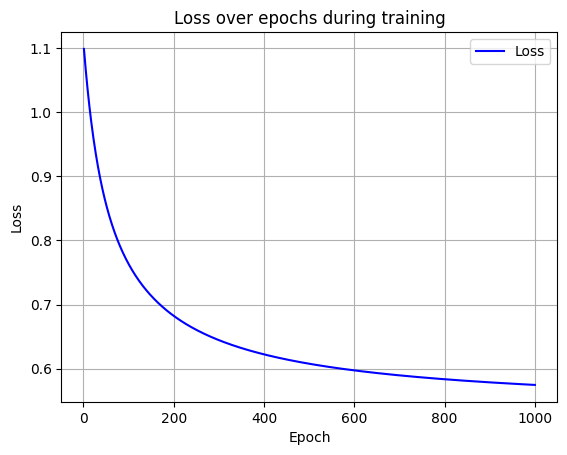

In [86]:
plt.plot(list(range(1, softmax_reg.num_iterations + 1)), softmax_reg.loss_history, color='blue', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs during training')
plt.legend()
plt.grid()
plt.show()
    